In [13]:
# Cargo las librerias 
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from ejercicio2 import (analizar_variables_categoricas, cuentaDistintos, frec_variables_num, 
                           atipicosAmissing, patron_perdidos, ImputacionCuant, ImputacionCuali)

In [14]:
# Cargo los datos
datos = pd.read_excel('VentaViviendas.xlsx')

# Comprobamos el tipo de formato de las variables variable que se ha asignado en la lectura.
# No todas las categoricas estan como queremos
datos.dtypes

year              int64
month             int64
price             int64
Luxury            int64
bedrooms          int64
bathrooms       float64
sqft_living       int64
sqft_lot          int64
floors          float64
waterfront        int64
view              int64
condition        object
sqft_above        int64
basement          int64
yr_built          int64
yr_renovated      int64
lat             float64
long            float64
dtype: object

In [15]:
# Genera una lista con los nombres de las variables.
variables = list(datos.columns) 

In [ ]:
# Indico las categóricas que aparecen como numéricas
numericasAcategoricas = ['Luxury', 'waterfront', 'view', 'basement', 'month']

In [17]:
# Las transformo en categóricas
for var in numericasAcategoricas:
    datos[var] = datos[var].astype(str)

In [18]:
# Seleccionar las columnas numéricas del DataFrame
numericas = datos.select_dtypes(include=['int', 'int32', 'int64','float', 'float32', 'float64']).columns

In [19]:
# Seleccionar las columnas categóricas del DataFrame
categoricas = [variable for variable in variables if variable not in numericas]
 
# Comprobamos que todas las variables tienen el formato que queremos  
datos.dtypes

year              int64
month            object
price             int64
Luxury           object
bedrooms          int64
bathrooms       float64
sqft_living       int64
sqft_lot          int64
floors          float64
waterfront       object
view             object
condition        object
sqft_above        int64
basement         object
yr_built          int64
yr_renovated      int64
lat             float64
long            float64
dtype: object

In [20]:
# Frecuencias de los valores en las variables categóricas
analizar_variables_categoricas(datos)

{'month':          n       %
 month             
 5      575  0.1150
 7      525  0.1050
 6      524  0.1048
 4      489  0.0978
 10     437  0.0874
 8      433  0.0866
 3      425  0.0850
 9      405  0.0810
 12     374  0.0748
 11     295  0.0590
 2      292  0.0584
 1      226  0.0452,
 'Luxury':            n       %
 Luxury              
 0       2886  0.5772
 1       2114  0.4228,
 'waterfront':                n       %
 waterfront              
 0           4852  0.9704
 -1           106  0.0212
 1             42  0.0084,
 'view':          n       %
 view              
 0     4509  0.9018
 1      491  0.0982,
 'condition':               n       %
 condition              
 B          3254  0.6508
 C          1289  0.2578
 A           412  0.0824
 ?            40  0.0080
 D             5  0.0010,
 'basement':              n       %
 basement              
 0         3044  0.6088
 1         1956  0.3912}

In [21]:
# Cuenta el número de valores distintos de cada una de las variables numéricas de un DataFrame
cuentaDistintos(datos)

,Columna,Distintos
0,year,2
1,price,1709
2,bedrooms,33
3,bathrooms,12
4,sqft_living,570
5,sqft_lot,3113
6,floors,6
7,sqft_above,527
8,yr_built,116
9,yr_renovated,58


In [22]:
# Tabla frecuencias para numericas


frec_variables_num(datos, ['bedrooms', 'bathrooms', 'floors'])

{'bedrooms':              n       %
 bedrooms              
 3         2233  0.4466
 4         1592  0.3184
 2          671  0.1342
 5          357  0.0714
 6           58  0.0116
 1           42  0.0084
 7            8  0.0016
 0            4  0.0008
 8            3  0.0006
 51           3  0.0006
 56           2  0.0004
 55           2  0.0004
 41           2  0.0004
 66           2  0.0004
 9            2  0.0004
 38           2  0.0004
 47           1  0.0002
 34           1  0.0002
 43           1  0.0002
 63           1  0.0002
 30           1  0.0002
 50           1  0.0002
 68           1  0.0002
 70           1  0.0002
 52           1  0.0002
 48           1  0.0002
 54           1  0.0002
 10           1  0.0002
 29           1  0.0002
 33           1  0.0002
 65           1  0.0002
 42           1  0.0002
 36           1  0.0002,
 'bathrooms':               n       %
 bathrooms              
 2.5        1623  0.3246
 2.0        1097  0.2194
 1.0         933  0.1866
 3.0     

In [33]:
# Descriptivos variables numéricas mediante función describe() de Python
descriptivos_num = datos.describe().T
descriptivos_num

,count,mean,std,min,25%,50%,75%,max
year,5000.0,2014.316800,0.465275,2014.0000,2014.000000,2014.0000,2015.000000,2015.000
price,5000.0,544129.100600,372986.940618,86500.0000,324937.500000,451000.0000,645000.000000,7062500.000
sqft_living,5000.0,2077.382000,916.477607,370.0000,1410.000000,1910.0000,2560.000000,10040.000
sqft_lot,4618.0,14868.509744,38888.621426,638.0000,5048.500000,7617.5000,10742.750000,1164794.000
sqft_above,5000.0,1784.898400,824.330910,370.0000,1190.000000,1550.0000,2220.000000,7680.000
yr_built,5000.0,1971.084200,29.242444,1900.0000,1951.000000,1975.0000,1996.000000,2015.000
lat,5000.0,47.561237,0.138218,47.1559,47.475275,47.5745,47.678925,47.777
long,5000.0,-122.213915,0.140557,-122.5050,-122.330000,-122.2265,-122.124000,-121.352


In [24]:
# Añadimos más descriptivos a los anteriores
for num in numericas:
    descriptivos_num.loc[num, "Asimetria"] = datos[num].skew()
    descriptivos_num.loc[num, "Kurtosis"] = datos[num].kurtosis()
    descriptivos_num.loc[num, "Rango"] = np.ptp(datos[num].dropna().values)

# Muestra valores perdidos
datos[variables].isna().sum()

year            0
month           0
price           0
Luxury          0
bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
floors          0
waterfront      0
view            0
condition       0
sqft_above      0
basement        0
yr_built        0
yr_renovated    0
lat             0
long            0
dtype: int64

In [25]:
# Comenzamos la depuración de los datos

# A veces los 'nan' vienen como como una cadena de caracteres, los modificamos a perdidos.
for x in categoricas:
    datos[x] = datos[x].replace('nan', np.nan) 

# Missings no declarados variables cualitativas (NSNC, ?)
datos['condition'] = datos['condition'].replace('?', np.nan)

# Missings no declarados variables cuanlitativas (-1)
datos['waterfront'] = datos['waterfront'].replace('-1', np.nan)

# Missings no declarados variables cuantitativas (-1)
datos['sqft_lot'] = datos['sqft_lot'].replace(-1, np.nan)

# Por si quisieramos hacerlo para cualquier valor menor igual que cero
datos['sqft_lot'] = datos['sqft_lot'].apply(lambda x: np.nan if x <= 0 else x)

#Variables cualitativas(consideradas numéricas) con categorías poco representadas.
datos['floors'] = datos['floors'].astype(str)
datos['floors'] = datos['floors'].replace({'2.5': '2+', '3.0': '2+', '3.5': '2+'})


datos['bedrooms'] = datos['bedrooms'].map(lambda x: 5 if x > 5 else x)
datos['bedrooms'] = datos['bedrooms'].astype(str)
datos['bedrooms'] = datos['bedrooms'].replace({'0': '0-1', '1': '0-1', '5': '5+'})

datos['bathrooms'] = datos['bathrooms'].map(lambda x: 3 if x > 3 else x)
datos['bathrooms'] = datos['bathrooms'].astype(str)
datos['bathrooms'] = datos['bathrooms'].replace({'3.0': '3+'})

#No hay errores de escritura en variables cualitativas (no diferencias entre mayúsculas y minúsculas..). 

#Variables cualitativas con categorías poco representadas
datos['condition'] = datos['condition'].replace({'D': 'C'})

# Modificación de la variable Yr_renovated
datos['prueba'] = np.where(datos['yr_renovated'] != 0, 1, datos['yr_renovated'])
# Cambiar la variable prueba a Object (ahora la variables es numérica)
datos['prueba'] = datos['prueba'].astype(str)
# Elimino la la variable yr_renovated
datos = datos.drop(columns = 'yr_renovated')

In [26]:
# Indico las variableObj y las Input (los atipicos y los missings se gestionan
# solo de las variables input)
varObjCont = datos['price']
varObjBin = datos['Luxury']

# Elimino las variables objetivo del conjunto de datos input, también elinimo las variables year y month
datos_input = datos.drop(['year','month','price', 'Luxury'], axis = 1)

# Genera una lista con los nombres de las variables del cojunto de datos input.
variables_input = list(datos_input.columns)  

# Selecionamos las variables numéricas
numericas_input = datos_input.select_dtypes(include = ['int', 'int32', 'int64','float', 'float32', 'float64']).columns

# Selecionamos las variables categóricas
categoricas_input = [variable for variable in variables_input if variable not in numericas_input]


In [27]:

## ATIPICOS

# Cuento el porcentaje de atipicos de cada variable. 

# Seleccionar las columnas numéricas en el DataFrame
# Calcular la proporción de valores atípicos para cada columna numérica
# utilizando una función llamada 'atipicosAmissing'
# 'x' representa el nombre de cada columna numérica mientras se itera a través de 'numericas'
# 'atipicosAmissing(datos_input[x])' es una llamada a una función que devuelve una dupla
# donde el segundo elemento ([1]) es el número de valores atípicos
# 'len(datos_input)' es el número total de filas en el DataFrame de entrada
# La proporción de valores atípicos se calcula dividiendo la cantidad de valores atípicos por el número total de filas
resultados = {x: atipicosAmissing(datos_input[x])[1] / len(datos_input) for x in numericas_input}


In [28]:
# Modifico los atipicos como missings
for x in numericas_input:
    datos_input[x] = atipicosAmissing(datos_input[x])[0]

# Muestra valores perdidos
datos[variables_input].isna().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot       382
floors           0
waterfront     106
view             0
condition       40
sqft_above       0
basement         0
yr_built         0
lat              0
long             0
prueba           0
dtype: int64

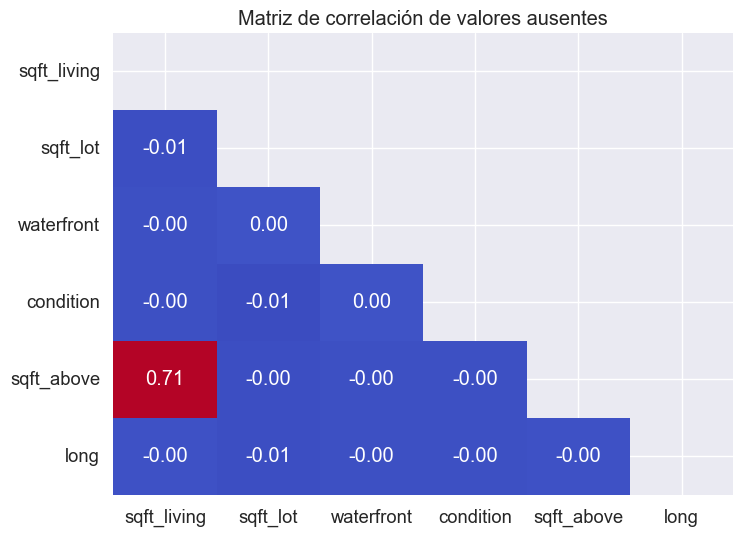

bedrooms       0.0000
bathrooms      0.0000
sqft_living    0.0004
sqft_lot       0.0764
floors         0.0000
waterfront     0.0212
view           0.0000
condition      0.0080
sqft_above     0.0002
basement       0.0000
yr_built       0.0000
lat            0.0000
long           0.0004
prueba         0.0000
dtype: float64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_22352\2298363347.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eliminar = [prop_missingsVars.index[x] for x in range(len(prop_missingsVars)) if prop_missingsVars[x] > 0.5]


In [29]:
# MISSINGS
# Visualiza un mapa de calor que muestra la matriz de correlación de valores ausentes en el conjunto de datos.

patron_perdidos(datos_input)

# Muestra total de valores perdidos por cada variable
datos_input[variables_input].isna().sum()

# Muestra proporción de valores perdidos por cada variable (guardo la información)
prop_missingsVars = datos_input.isna().sum()/len(datos_input)

# Creamos la variable prop_missings que recoge el número de valores perdidos por cada observación
datos_input['prop_missings'] = datos_input.isna().mean(axis = 1)

# Realizamos un estudio descriptivo básico a la nueva variable
datos_input['prop_missings'].describe()

# Calculamos el número de valores distintos que tiene la nueva variable
len(datos_input['prop_missings'].unique())

# Elimino las observaciones con mas de la mitad de datos missings (no hay ninguna)
eliminar = datos_input['prop_missings'] > 0.5
datos_input = datos_input[~eliminar]
varObjBin = varObjBin[~eliminar]
varObjCont = varObjCont[~eliminar]

# Agrego 'prop_missings' a la lista de nombres de variables input
variables_input.append('prop_missings')
categoricas_input.append('prop_missings')

# Elimino las variables con mas de la mitad de datos missings (no hay ninguna)
eliminar = [prop_missingsVars.index[x] for x in range(len(prop_missingsVars)) if prop_missingsVars[x] > 0.5]
datos_input = datos_input.drop(eliminar, axis = 1)

# Transformo la nueva variable en categórica (ya que tiene pocos valores diferentes)
datos_input["prop_missings"] = datos_input["prop_missings"].astype(str)

# Recategorizo categoricas con "suficientes" observaciones missings
# La que más tiene es 'waterfront' (pero pocas)
# Se considera una categoria mas los missing.
print(prop_missingsVars)
datos_input['waterfront'] = datos_input['waterfront'].fillna('Desconocido')


In [30]:

## IMPUTACIONES
# Imputo todas las cuantitativas, seleccionar el tipo de imputacion: media, mediana o aleatorio
for x in numericas_input:
    datos_input[x] = ImputacionCuant(datos_input[x], 'mediana')

# Imputo todas las cualitativas, seleccionar el tipo de imputacion: moda o aleatorio
for x in categoricas_input:
    datos_input[x] = ImputacionCuali(datos_input[x], 'aleatorio')

# Reviso que no queden datos missings
datos_input.isna().sum()


bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
basement         0
yr_built         0
lat              0
long             0
prueba           0
prop_missings    0
dtype: int64